In [1]:
#Import necessary libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# Import csv file
df=pd.read_csv('brain_stroke.csv')

In [3]:
# To get first five record from dataset
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
# To get the info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [11]:
# To check the number of rows and columns in data
df.shape

(4981, 11)

In [13]:
# To generate descriptive statistics 
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


#  EDA

<Axes: xlabel='age', ylabel='Count'>

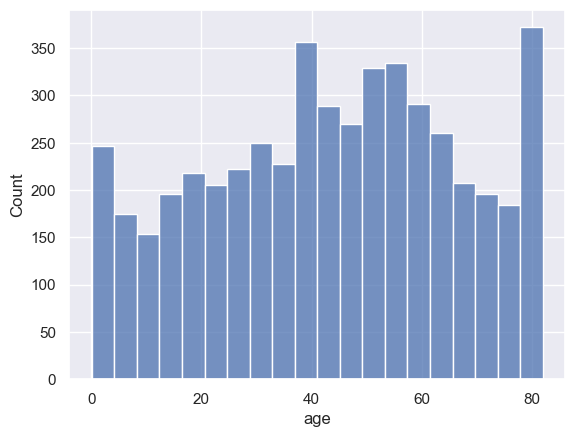

In [15]:
sns.set_theme(style='darkgrid')
sns.histplot(df.age)

<Axes: xlabel='count', ylabel='work_type'>

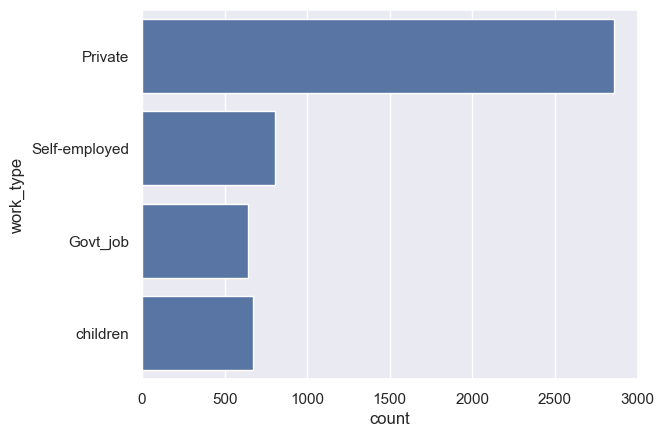

In [17]:
sns.countplot(df.work_type)

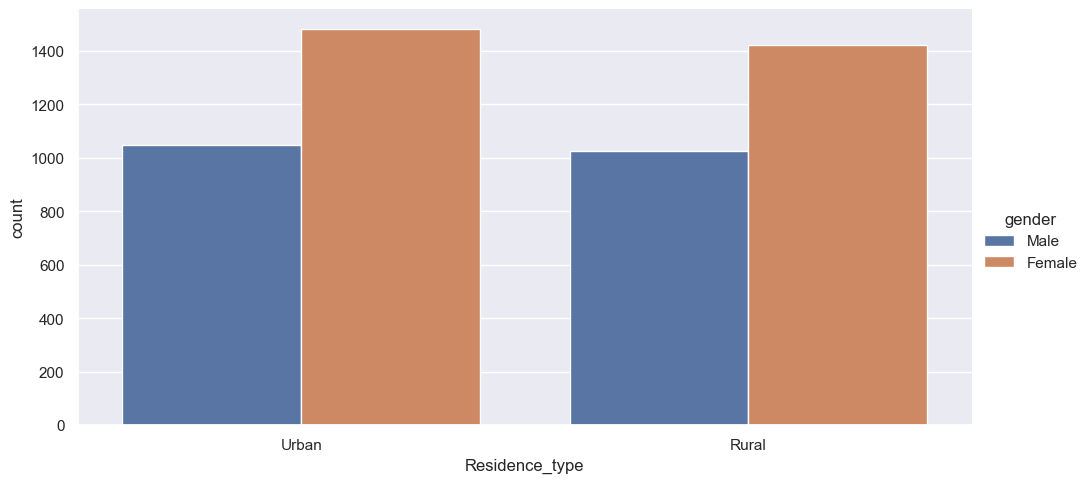

In [19]:
sns.catplot(data=df,x='Residence_type',kind='count',height=5,aspect=2,hue='gender')

<Axes: ylabel='count'>

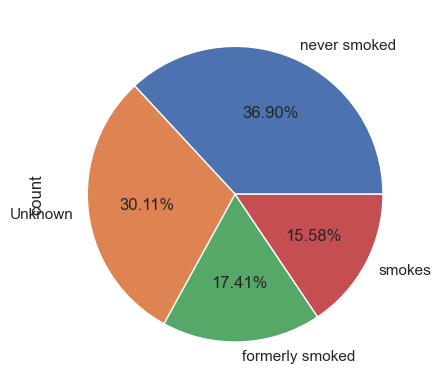

In [21]:
df_ss=df['smoking_status'].value_counts()
df_ss.plot(kind='pie',autopct='%.2f%%')

<Axes: ylabel='count'>

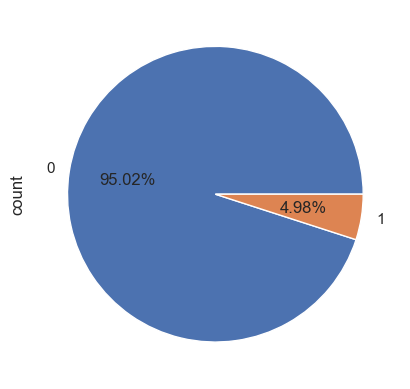

In [23]:
df_ss=df['stroke'].value_counts()
df_ss.plot(kind='pie',autopct='%.2f%%')

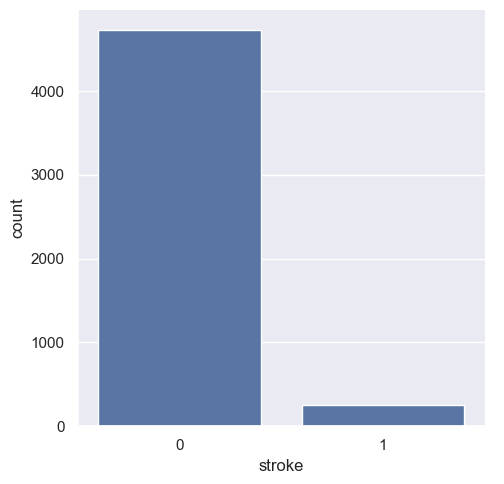

In [25]:
sns.catplot(data=df,x='stroke',kind='count')

age                     Axes(0.125,0.53;0.0731132x0.35)
hypertension         Axes(0.212736,0.53;0.0731132x0.35)
heart_disease        Axes(0.300472,0.53;0.0731132x0.35)
avg_glucose_level    Axes(0.388208,0.53;0.0731132x0.35)
bmi                  Axes(0.475943,0.53;0.0731132x0.35)
stroke               Axes(0.563679,0.53;0.0731132x0.35)
dtype: object

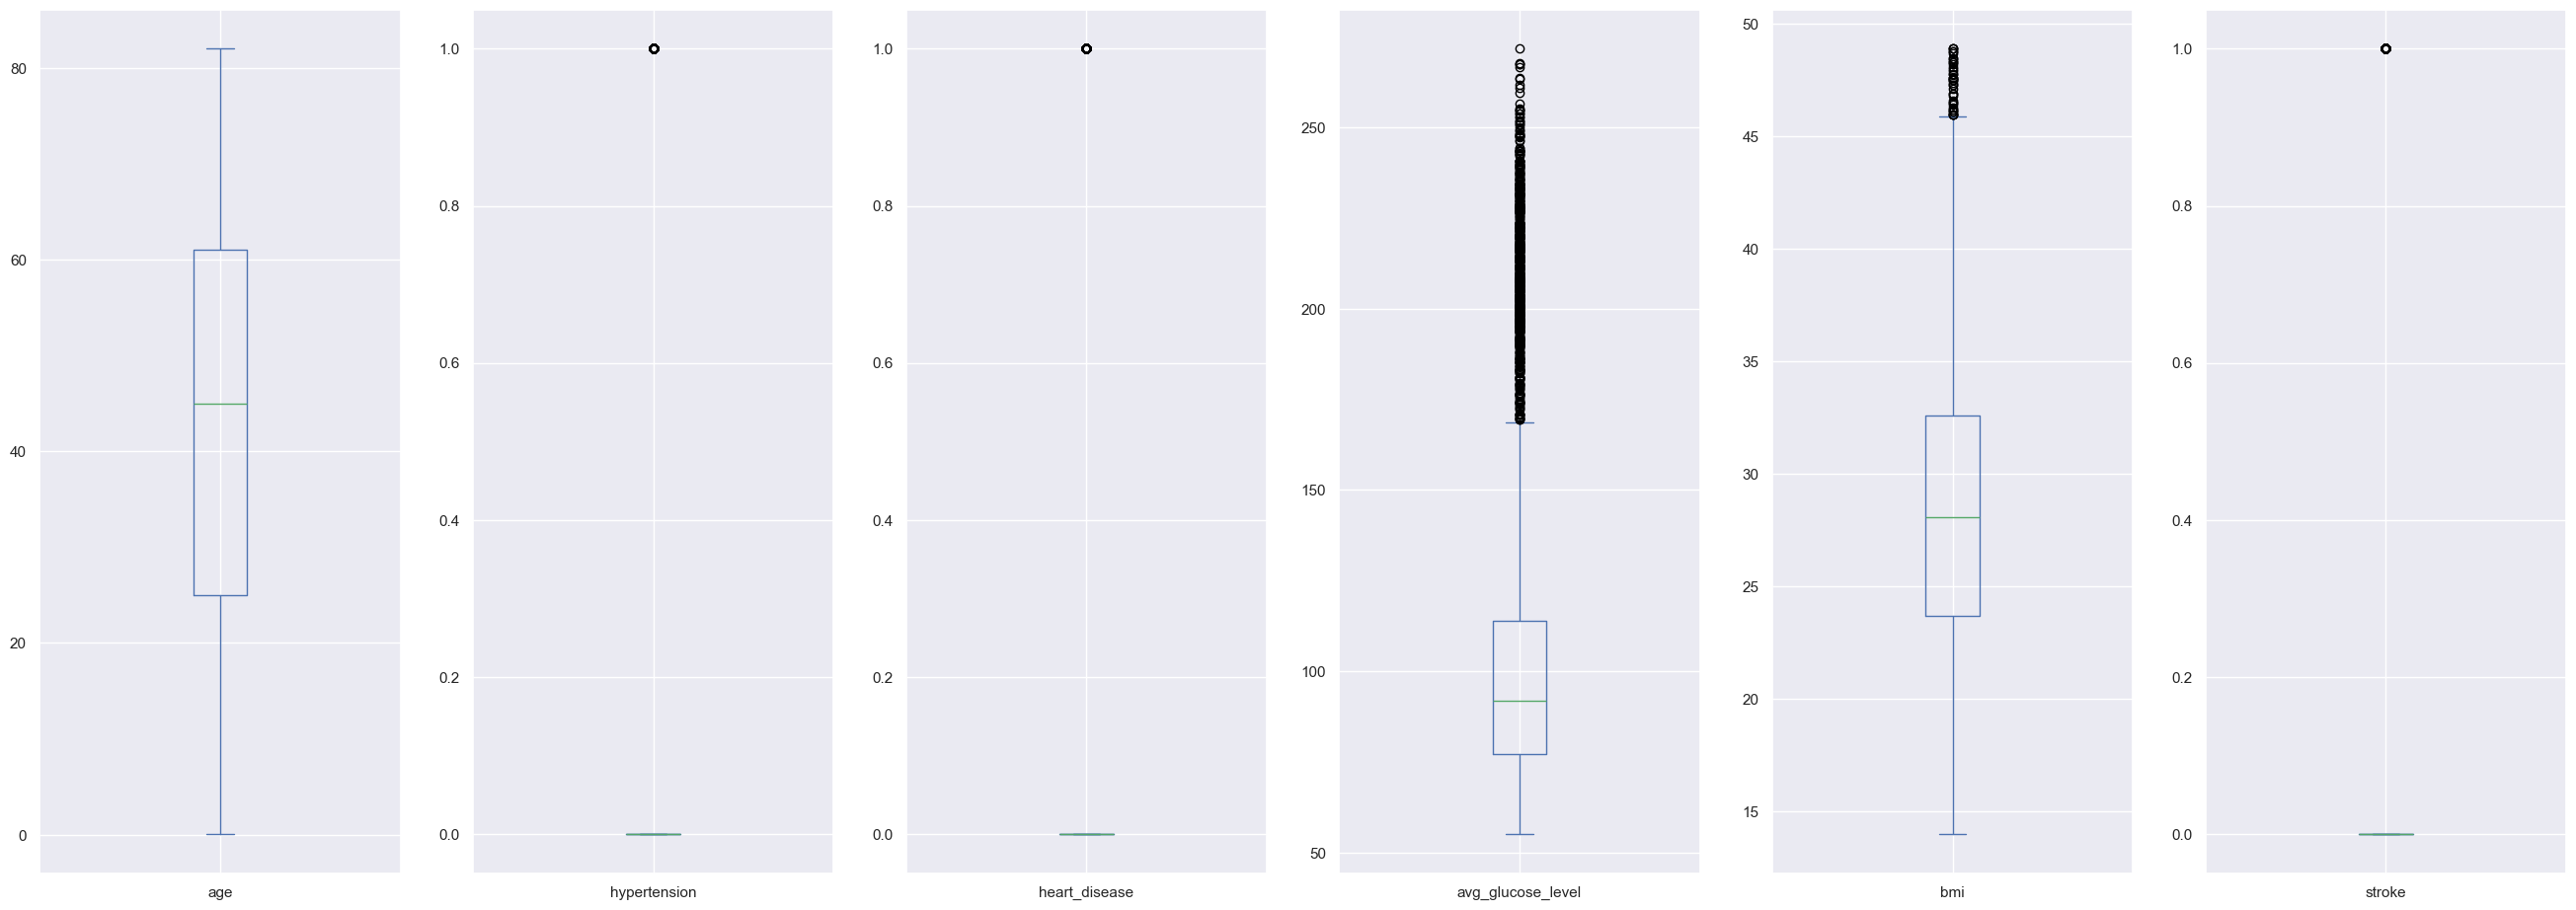

In [27]:
# To create a series of box plots for each column in a DataFrame
df.plot(kind='box',subplots=True,layout=(2,9),figsize=(50,25))

In [29]:
# One hot encoding
df=pd.get_dummies(df,columns=['work_type'],dtype='int')

In [31]:
df=pd.get_dummies(df,columns=['Residence_type'],dtype='int')

In [33]:
df=pd.get_dummies(df,columns=['smoking_status'],dtype='int')

In [35]:
df=pd.get_dummies(df,columns=['ever_married'],dtype='int')

In [37]:
df=pd.get_dummies(df,columns=['gender'],dtype='int')

In [39]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,gender_Female,gender_Male
0,67.0,0,1,228.69,36.6,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1
1,80.0,0,1,105.92,32.5,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1
2,49.0,0,0,171.23,34.4,1,0,1,0,0,0,1,0,0,0,1,0,1,1,0
3,79.0,1,0,174.12,24.0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1


In [41]:
# To drop the unnecessary columns
df.drop(['gender_Male','ever_married_No','smoking_status_formerly smoked','Residence_type_Rural','work_type_children'],axis=1,inplace=True)

In [43]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Urban,smoking_status_Unknown,smoking_status_never smoked,smoking_status_smokes,ever_married_Yes,gender_Female
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,0,1,0
1,80.0,0,1,105.92,32.5,1,0,1,0,0,0,1,0,1,0
2,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,1,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,1,1
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,0,1,0


# Train test split

In [45]:
###Train test split
from sklearn.model_selection import train_test_split


In [47]:
## dividing the data into target and ind variable]
###target:Stroke
x=df.drop('stroke',axis=1) #independent
y=df['stroke']#target


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

# Model building

# Logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [53]:
y_pred=lr.predict(x_test)

In [55]:
#Evaluation
from sklearn.metrics import accuracy_score
####traing accuracy
accuracy_score(y_train,lr.predict(x_train))

0.9525602409638554

In [57]:
accuracy_score(y_test,lr.predict(x_test))

0.9408224674022067

In [59]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [61]:
### confusion matrix
confusion_matrix(y_test,y_pred)

array([[938,   0],
       [ 59,   0]], dtype=int64)

In [63]:
from sklearn.metrics import precision_score,recall_score
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('precision:',prec)
print('recall:',recall)


precision: 0.0
recall: 0.0


In [65]:
from sklearn.metrics import classification_report
classi=classification_report(y_test,y_pred)
print('classification report:',classi)


classification report:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       938
           1       0.00      0.00      0.00        59

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.91       997



In [33]:
## ROC and AUC

In [67]:
from sklearn.metrics import roc_auc_score

In [69]:
log_roc_auc_score= roc_auc_score(y_test,y_pred)
print('Area under the curve is',log_roc_auc_score)

Area under the curve is 0.5


In [71]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print(fpr,tpr,threshold)

[0. 1.] [0. 1.] [1 0]


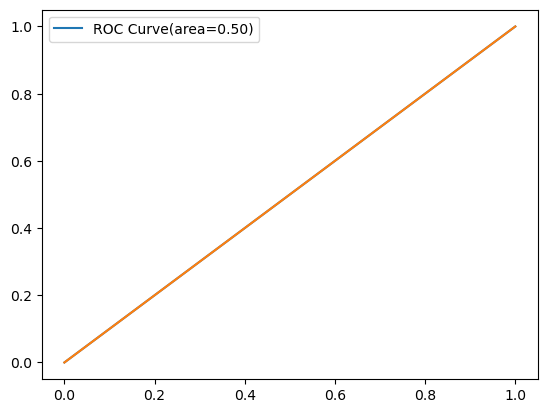

In [37]:
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve(area=%0.2f)"%log_roc_auc_score)
plt.plot(fpr,tpr)
plt.legend()
plt.show()

In [73]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

In [75]:
y_train.value_counts()

stroke
0    3795
1     189
Name: count, dtype: int64

# oversampling

In [77]:
from imblearn.over_sampling import RandomOverSampler

In [79]:
ros = RandomOverSampler(random_state=1)

In [81]:
x_sample2, y_sample2 = ros.fit_resample(x_train,y_train)

In [83]:
pd.Series(y_sample2).value_counts()

stroke
0    3795
1    3795
Name: count, dtype: int64

In [85]:
lr3 = LogisticRegression()
lr3.fit(x_sample2, y_sample2)

LogisticRegression()

In [87]:
y_pred3= lr3.predict(x_test)

In [89]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84       938
           1       0.17      0.85      0.28        59

    accuracy                           0.74       997
   macro avg       0.58      0.79      0.56       997
weighted avg       0.94      0.74      0.81       997



In [91]:
####traing accuracy
accuracy_score(y_sample2,lr.predict(x_sample2))

0.5018445322793149

In [93]:
accuracy_score(y_test,lr.predict(x_test))

0.9408224674022067

In [95]:
### confusion matrix
confusion_matrix(y_test,y_pred3)

array([[685, 253],
       [  9,  50]], dtype=int64)

# Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_sample2, y_sample2)

DecisionTreeClassifier()

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score(y_sample2,dtree.predict(x_sample2))

1.0

In [101]:
accuracy_score(y_test,dtree.predict(x_test))

0.9077231695085256

In [173]:
y_pred3= dtree.predict(x_test)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       938
           1       0.18      0.15      0.16        59

    accuracy                           0.91       997
   macro avg       0.56      0.55      0.56       997
weighted avg       0.90      0.91      0.90       997



# KNN


In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_sample2,y_sample2)

KNeighborsClassifier()

In [107]:
from sklearn.metrics import accuracy_score
accuracy_score(y_sample2,knn.predict(x_sample2))

0.9598155467720685

In [109]:
accuracy_score(y_test,knn.predict(x_test))

0.8445336008024072

In [111]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,knn.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       938
           1       0.16      0.37      0.22        59

    accuracy                           0.84       997
   macro avg       0.56      0.62      0.57       997
weighted avg       0.91      0.84      0.87       997



# GaussianNB

In [113]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_sample2,y_sample2)

GaussianNB()

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_sample2,nb.predict(x_sample2))

0.7287220026350462

In [117]:
accuracy_score(y_test,nb.predict(x_test))


0.7452357071213641

In [175]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,nb.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       938
           1       0.16      0.75      0.26        59

    accuracy                           0.75       997
   macro avg       0.57      0.75      0.55       997
weighted avg       0.93      0.75      0.81       997



# Random forest

In [119]:
## Random forest
from sklearn.ensemble import RandomForestClassifier
Rforest=RandomForestClassifier()
Rforest.fit(x_sample2,y_sample2)

RandomForestClassifier()

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_sample2,Rforest.predict(x_sample2))

1.0

In [123]:
accuracy_score(y_test,Rforest.predict(x_test))

0.9227683049147443

In [125]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,Rforest.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       938
           1       0.09      0.03      0.05        59

    accuracy                           0.92       997
   macro avg       0.52      0.51      0.50       997
weighted avg       0.89      0.92      0.91       997



# SVC

In [127]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_sample2,y_sample2)

SVC()

In [129]:
accuracy_train=accuracy_score(y_sample2,svm.predict(x_sample2))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.7606060606060606
test accuracy 0.708124373119358


In [131]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,svm.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82       938
           1       0.15      0.86      0.26        59

    accuracy                           0.71       997
   macro avg       0.57      0.78      0.54       997
weighted avg       0.94      0.71      0.79       997



# SVC- sigmoid

In [133]:
from sklearn.svm import SVC
svm_s=SVC(kernel='sigmoid')
svm_s.fit(x_sample2,y_sample2)

SVC(kernel='sigmoid')

In [135]:
accuracy_train=accuracy_score(y_sample2,svm_s.predict(x_sample2))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm_s.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.4147562582345191
test accuracy 0.40421263791374124


In [143]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,svm_s.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.92      0.40      0.56       938
           1       0.04      0.42      0.08        59

    accuracy                           0.40       997
   macro avg       0.48      0.41      0.32       997
weighted avg       0.87      0.40      0.53       997



# SVC-linear

In [139]:
from sklearn.svm import SVC
svm_l=SVC(kernel='linear',C=0.1)
svm_l.fit(x_sample2,y_sample2)

SVC(C=0.1, kernel='linear')

In [140]:
accuracy_train=accuracy_score(y_sample2,svm_l.predict(x_sample2))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm_l.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.7708827404479578
test accuracy 0.7251755265797393


In [145]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,svm_l.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.99      0.71      0.83       938
           1       0.17      0.90      0.28        59

    accuracy                           0.73       997
   macro avg       0.58      0.81      0.55       997
weighted avg       0.94      0.73      0.80       997



# SVC- poly

In [147]:
from sklearn.svm import SVC
svm_p=SVC(kernel='poly')
svm_p.fit(x_sample2,y_sample2)

SVC(kernel='poly')

In [149]:
accuracy_train=accuracy_score(y_sample2,svm_p.predict(x_sample2))
print('training accuracy',accuracy_train)
accuracy_test=accuracy_score(y_test,svm_p.predict(x_test))
print('test accuracy',accuracy_test)

training accuracy 0.7671936758893281
test accuracy 0.7552657973921765


In [151]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,svm_p.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       938
           1       0.17      0.83      0.29        59

    accuracy                           0.76       997
   macro avg       0.58      0.79      0.57       997
weighted avg       0.94      0.76      0.82       997



In [204]:
data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree','K-nearestNeighbor','GaussionNB', 'Random forest', 'SVC',
                  'SVC-Sigmoid', 'SVC-linear', 'SVC-Poly'],
    'Accuracy': [74, 91, 84, 75, 92,71,40, 73, 76],
    'Recall for 0 class': [0.73, 0.96, 0.87, 0.75, 0.98, 0.70, 0.40, 0.71, 0.75]
}

# Create DataFrame
df1 = pd.DataFrame(data)

# Display the DataFrame
display(df1)

,Algorithm,Accuracy,Recall for 0 class
0,Logistic Regression,74,0.73
1,Decision Tree,91,0.96
2,K-nearestNeighbor,84,0.87
3,GaussionNB,75,0.75
4,Random forest,92,0.98
5,SVC,71,0.70
6,SVC-Sigmoid,40,0.40
7,SVC-linear,73,0.71
8,SVC-Poly,76,0.75


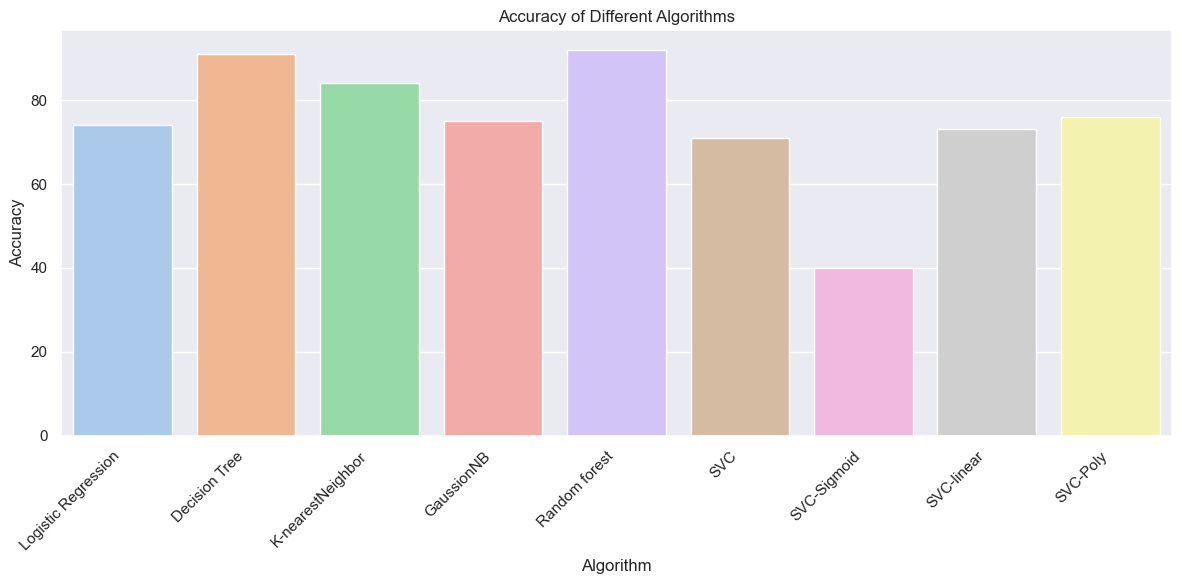

In [191]:
# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Accuracy', data=df1, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.tight_layout()

# Show the plot
plt.show()

In [157]:
param={'n_estimators':[100,105,106,108,110],'criterion':['gini','entropy','log_loss'],'max_depth':[5,6,7,9,10],'min_samples_split':[3,4,5,6,7],'min_samples_leaf':[2,3,4,5]}

# Hyper parameter tunning

In [159]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(Rforest,param,cv=5,scoring='accuracy')

In [161]:
cv.fit(x_sample2,y_sample2)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 105, 106, 108, 110]},
             scoring='accuracy')

In [163]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 108}

In [165]:
y_pred_cv=cv.predict(x_test)
accuracy_score(y_test,y_pred_cv)

0.8575727181544633

In [167]:
accuracy_score(y_train,cv.predict(x_train))

0.9382530120481928

In [171]:
from sklearn.metrics import classification_report
cls=classification_report(y_test,cv.predict(x_test))
print(cls)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       938
           1       0.20      0.47      0.28        59

    accuracy                           0.86       997
   macro avg       0.58      0.68      0.60       997
weighted avg       0.92      0.86      0.88       997



# Prediction on unseen data

In [199]:
new_data=np.array([70,0,1,600,35,1,0,1,0,1,0,1,0,1]).reshape(1,-1)
new_data

array([[ 70,   0,   1, 600,  35,   1,   0,   1,   0,   1,   0,   1,   0,
          1]])

In [201]:
cv.predict(new_data)

array([0], dtype=int64)